In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
interatomic_distances = np.array([1.2, 2.0, 3.2, 2.5, 1.6, 3.7, 3.8, 4.0, 4.2, 3.8, 4.8, 1.0, 0.4])
print(interatomic_distances.mean())

2.7846153846153845


In [70]:
inner_cutoff = 1.0
outer_cutoff = 1.5
# scale_alpha = 0.1

In [71]:
def calc_sigma(interatomic_distances, inner_cutoff, outer_cutoff, scale_alpha):
    return sum(interatomic_distances * np.exp(- (interatomic_distances / scale_alpha))) / sum(np.exp(- (interatomic_distances / scale_alpha)))

def calc_u(sigma, inner_cutoff, outer_cutoff):
    return (sigma - inner_cutoff) / (outer_cutoff - inner_cutoff)

def calc_weight(u, sigma, inner_cutoff, outer_cutoff):
    if sigma < inner_cutoff:
        return 1
    elif sigma >= outer_cutoff:
        return 0
    else:
        return -6 * u ** 5 + 15 * u ** 4 - 10 * u ** 3 + 1

In [72]:
sigma = calc_sigma(interatomic_distances, inner_cutoff, outer_cutoff, scale_alpha)
u = calc_u(sigma, inner_cutoff, outer_cutoff)
weight = calc_weight(u, sigma, inner_cutoff, outer_cutoff)

In [73]:
list_scale_alpha = np.linspace(0.01, 2, 100)
list_sigma = [calc_sigma(interatomic_distances, inner_cutoff, outer_cutoff, scale_alpha) for scale_alpha in list_scale_alpha]
list_u = [calc_u(sigma, inner_cutoff, outer_cutoff) for sigma in list_sigma]
list_weight = [calc_weight(u, sigma, inner_cutoff, outer_cutoff) for u, sigma in zip(list_u, list_sigma)]

Text(0, 0.5, 'weight')

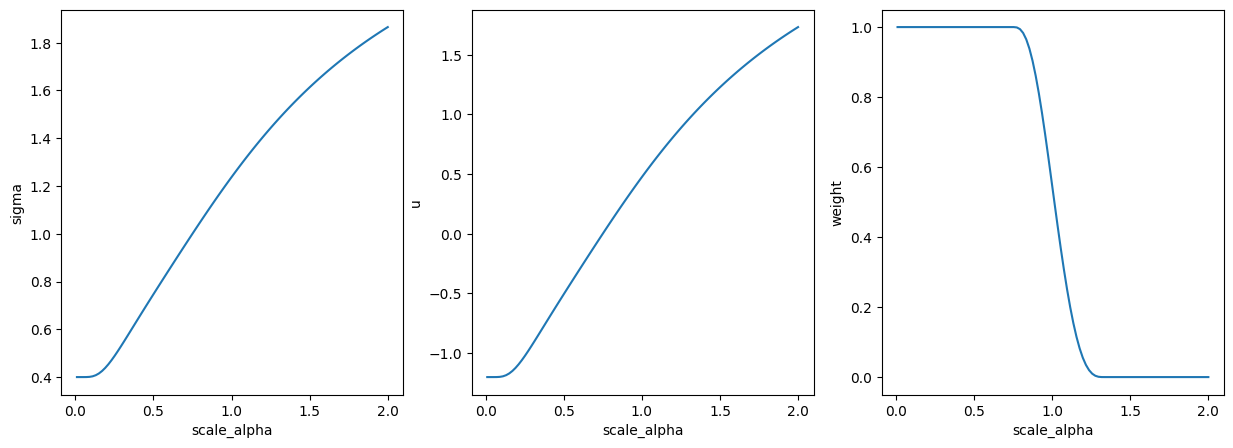

In [74]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(list_scale_alpha, list_sigma)
ax[0].set_xlabel("scale_alpha")
ax[0].set_ylabel("sigma")

ax[1].plot(list_scale_alpha, list_u)
ax[1].set_xlabel("scale_alpha")
ax[1].set_ylabel("u")

ax[2].plot(list_scale_alpha, list_weight)
ax[2].set_xlabel("scale_alpha")
ax[2].set_ylabel("weight")